In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
city_day = pd.read_csv('city_day.csv')
city_day['Date'] = pd.to_datetime(city_day['Date'])
city_day = city_day.bfill().ffill()

In [3]:
city_day['PM'] = city_day['PM2.5']+city_day['PM10']
city_day['N'] = city_day['NO']+city_day['NO2']+city_day['NOx']
city_day['misc'] = city_day['Benzene']+city_day['Toluene']+city_day['Xylene']

In [4]:
cities_AQI = city_day.pivot_table(values = 'AQI', index =['Date'], columns = 'City')
cities_PM = city_day.pivot_table(values = 'PM', index =['Date'], columns = 'City')
cities_N = city_day.pivot_table(values = 'N', index =['Date'], columns = 'City')
cities_misc = city_day.pivot_table(values = 'misc', index =['Date'], columns = 'City')
cities_NH3 = city_day.pivot_table(values = 'NH3', index =['Date'], columns = 'City')
cities_CO = city_day.pivot_table(values = 'CO', index =['Date'], columns = 'City')
cities_SO2 = city_day.pivot_table(values = 'SO2', index =['Date'], columns = 'City')
cities_O3 = city_day.pivot_table(values = 'O3', index =['Date'], columns = 'City')

In [5]:
cities_AQI = cities_AQI.resample(rule='MS').mean()
cities_PM = cities_PM.resample(rule='MS').mean()
cities_N = cities_N.resample(rule='MS').mean()
cities_misc = cities_misc.resample(rule='MS').mean()
cities_NH3 = cities_NH3.resample(rule='MS').mean()
cities_CO = cities_CO.resample(rule='MS').mean()
cities_SO2 = cities_SO2.resample(rule='MS').mean()
cities_O3 = cities_O3.resample(rule='MS').mean()

In [6]:
cities_AQI['India_AQI'] = cities_AQI.mean(axis=1)
cities_AQI['India_PM'] = cities_PM.mean(axis=1)
cities_AQI['India_N'] = cities_N.mean(axis=1)
cities_AQI['India_misc'] = cities_misc.mean(axis=1)
cities_AQI['India_NH3'] = cities_NH3.mean(axis=1)
cities_AQI['India_CO'] = cities_CO.mean(axis=1)
cities_AQI['India_SO2'] = cities_SO2.mean(axis=1)
cities_AQI['India_O3'] = cities_O3.mean(axis=1)

In [7]:
cities_AQI.reset_index()
cities = cities_AQI[['India_AQI','India_PM', 'India_N', 'India_misc','India_NH3', 'India_CO', 'India_SO2', 'India_O3']]

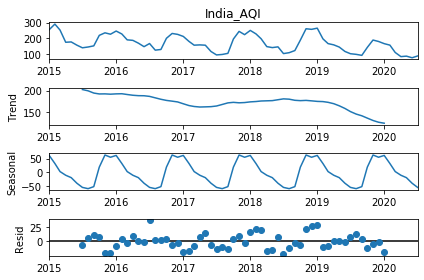

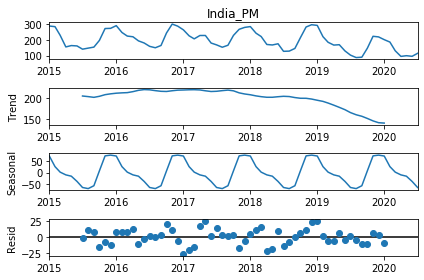

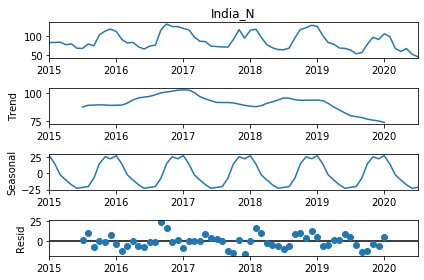

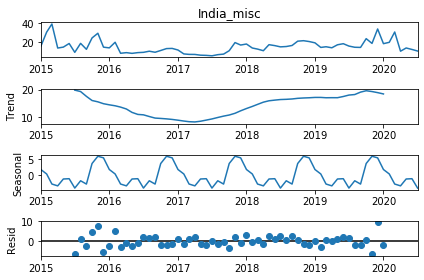

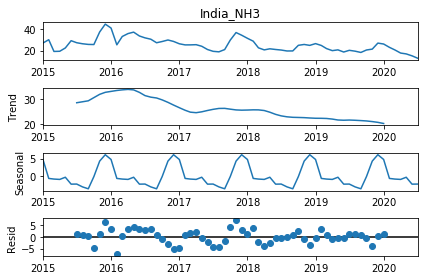

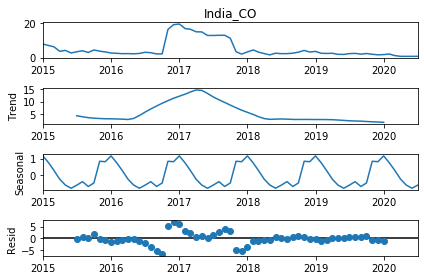

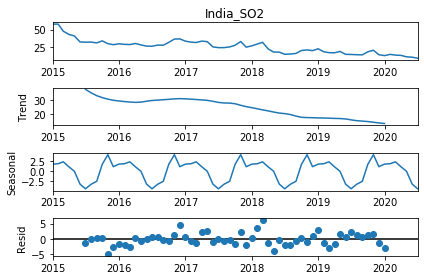

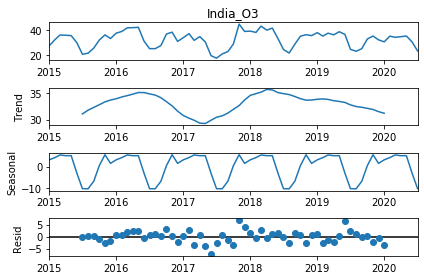

In [8]:
res_AQI = sm.tsa.seasonal_decompose(cities['India_AQI'], model = 'additive').plot()
res_PM = sm.tsa.seasonal_decompose(cities['India_PM'], model = 'additive').plot()
res_N = sm.tsa.seasonal_decompose(cities['India_N'], model = 'additive').plot()
res_misc = sm.tsa.seasonal_decompose(cities['India_misc'], model = 'additive').plot()
res_NH3 = sm.tsa.seasonal_decompose(cities['India_NH3'], model = 'additive').plot()
res_CO = sm.tsa.seasonal_decompose(cities['India_CO'], model = 'additive').plot()
res_SO2 = sm.tsa.seasonal_decompose(cities['India_SO2'], model = 'additive').plot()
res_O3 = sm.tsa.seasonal_decompose(cities['India_O3'], model = 'additive').plot()

In [9]:
print("AQI = ", sm.tsa.adfuller(cities['India_AQI'], autolag = 'AIC')[1],
      "PM = ", sm.tsa.adfuller(cities['India_PM'], autolag = 'AIC')[1],
      "N = ", sm.tsa.adfuller(cities['India_N'], autolag = 'AIC')[1],
      "misc = ", sm.tsa.adfuller(cities['India_misc'], autolag = 'AIC')[1],
      "NH3 = ", sm.tsa.adfuller(cities['India_NH3'], autolag = 'AIC')[1],
      "CO = ", sm.tsa.adfuller(cities['India_CO'], autolag = 'AIC')[1],
      "SO2 = ", sm.tsa.adfuller(cities['India_SO2'], autolag = 'AIC')[1],
      "O3 = ", sm.tsa.adfuller(cities['India_O3'], autolag = 'AIC')[1])
#adf, pval, usedlag, nobs, critical values, icbest, resstore

AQI =  0.9624991519936928 PM =  0.9710711274667021 N =  1.5507383575275782e-06 misc =  0.01821596469484335 NH3 =  0.027279711067909034 CO =  0.2167849829195469 SO2 =  0.04208567735024011 O3 =  3.2967976137586138e-06


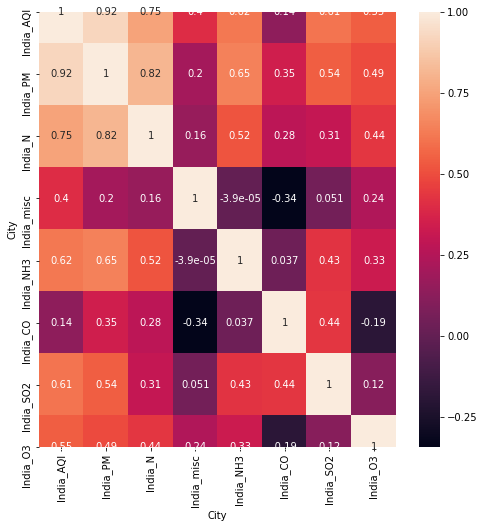

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(cities.corr(), annot = True)

Only N, CO and SO2 have a p value < 0.05, 
misc can be dropped, so can CO
This implies that the rest of the variables are non-stationary
Let's visualize the variables

Clear trend and seasonality in a lot of varaibles, let's perform differencing on non stationary variables

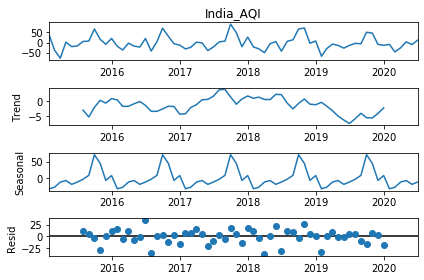

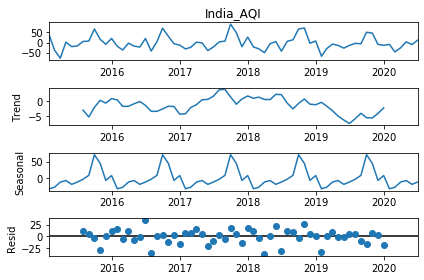

In [11]:
diff_city_AQI = cities['India_AQI'].diff(periods = 1)
diff_city_AQI.dropna(inplace = True)
sm.tsa.seasonal_decompose(diff_city_AQI, model = 'additive').plot()

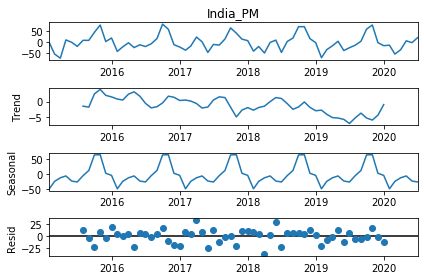

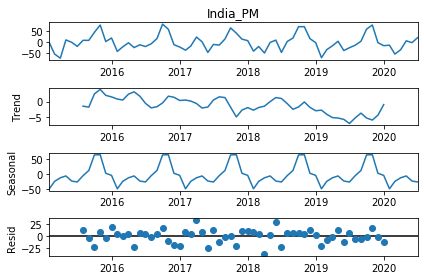

In [12]:
diff_city_PM = cities['India_PM'].diff(periods = 1)
diff_city_PM.dropna(inplace = True)
sm.tsa.seasonal_decompose(diff_city_PM, model = 'additive').plot()

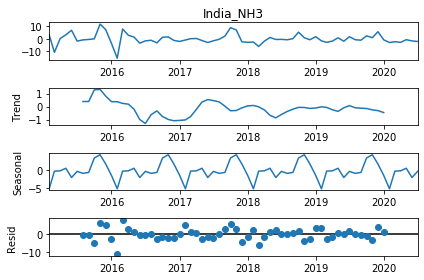

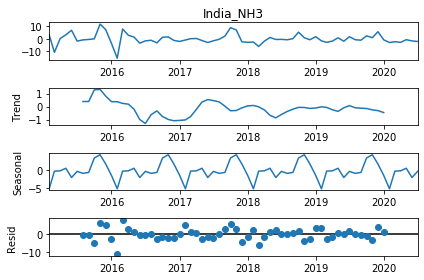

In [13]:
diff_city_NH3 = cities['India_NH3'].diff(periods = 1)
diff_city_NH3.dropna(inplace = True)
sm.tsa.seasonal_decompose(diff_city_NH3, model = 'additive').plot()

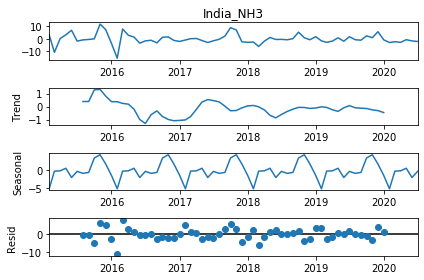

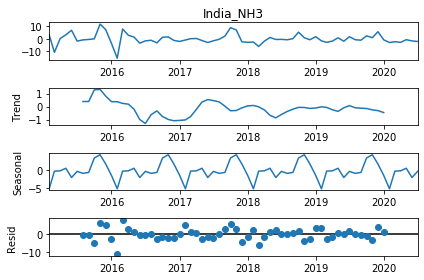

In [14]:
diff_city_SO2 = cities['India_SO2'].diff(periods = 1)
diff_city_SO2.dropna(inplace = True)
sm.tsa.seasonal_decompose(diff_city_NH3, model = 'additive').plot()

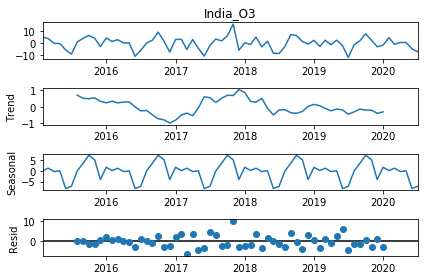

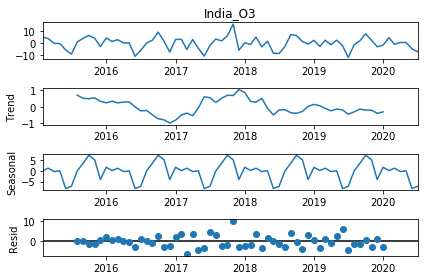

In [15]:
diff_city_O3 = cities['India_O3'].diff(periods = 1)
diff_city_O3.dropna(inplace = True)
sm.tsa.seasonal_decompose(diff_city_O3, model = 'additive').plot()

In [16]:
print("AQI = ", sm.tsa.adfuller(diff_city_AQI, autolag = 'AIC')[1],
      "PM = ", sm.tsa.adfuller(diff_city_PM, autolag = 'AIC')[1],
      "N = ", sm.tsa.adfuller(cities['India_N'], autolag = 'AIC')[1],
      "NH3 = ", sm.tsa.adfuller(diff_city_NH3, autolag = 'AIC')[1],
      "SO2 = ", sm.tsa.adfuller(diff_city_SO2, autolag = 'AIC')[1],
      "O3 = ", sm.tsa.adfuller(diff_city_O3, autolag = 'AIC')[1])

AQI =  1.9790355690347987e-09 PM =  9.080094002207606e-10 N =  1.5507383575275782e-06 NH3 =  1.1308162114854944e-08 SO2 =  1.8720782601976286e-08 O3 =  0.018984005400704534


Now all the variables are stationary

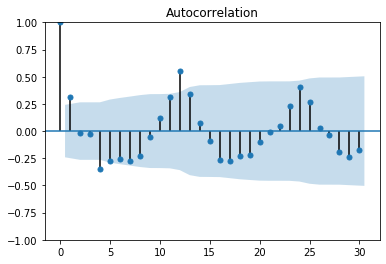

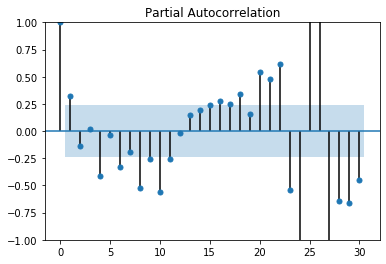

In [17]:
ga1 = sm.graphics.tsa.plot_acf(diff_city_AQI, lags=30)
gp1 = sm.graphics.tsa.plot_pacf(diff_city_AQI,lags=30)

P Q value for AQI = 1,1

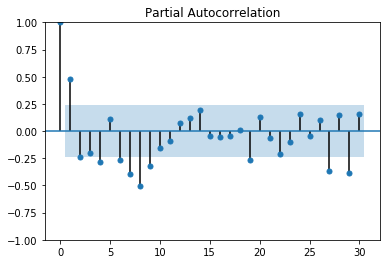

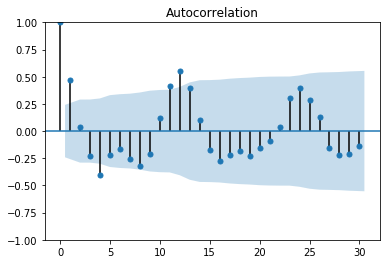

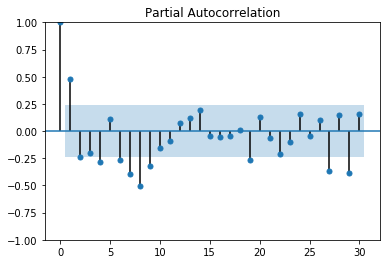

In [18]:
sm.graphics.tsa.plot_acf(diff_city_PM, lags=30)
sm.graphics.tsa.plot_pacf(diff_city_PM,lags=30)

P Q value for PM = 1,1

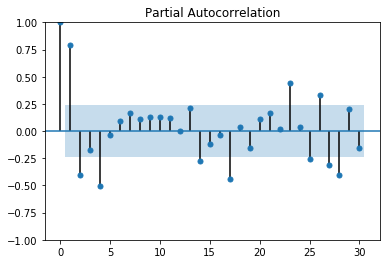

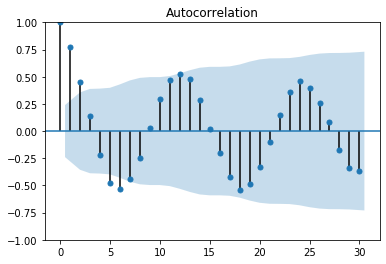

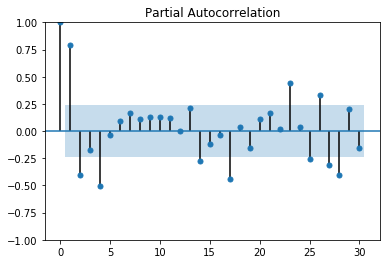

In [19]:
sm.graphics.tsa.plot_acf(cities['India_N'], lags=30)
sm.graphics.tsa.plot_pacf(cities['India_N'],lags=30)

P Q value for N = 2,2

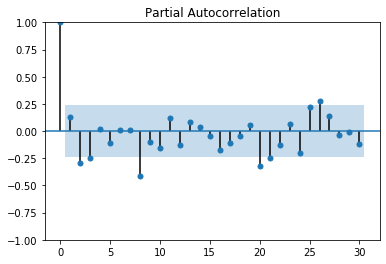

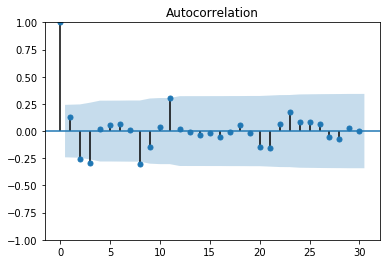

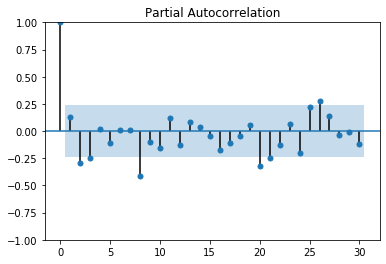

In [20]:
sm.graphics.tsa.plot_acf(diff_city_NH3, lags=30)
sm.graphics.tsa.plot_pacf(diff_city_NH3,lags=30)

P Q value for NH3 = 1,1

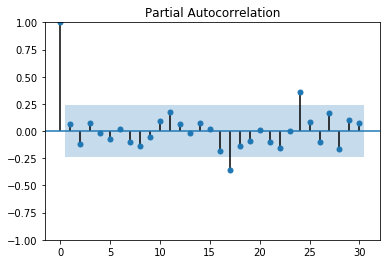

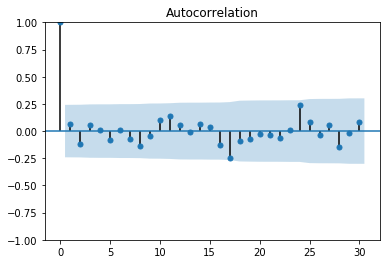

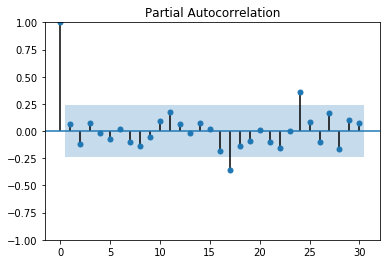

In [21]:
sm.graphics.tsa.plot_acf(diff_city_SO2, lags=30)
sm.graphics.tsa.plot_pacf(diff_city_SO2,lags=30)

P Q value for SO2 = 2,2

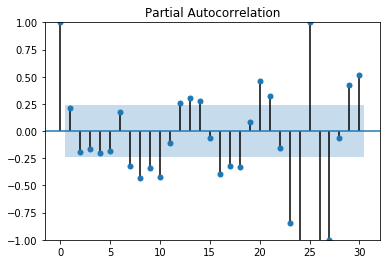

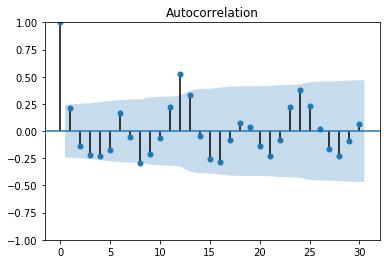

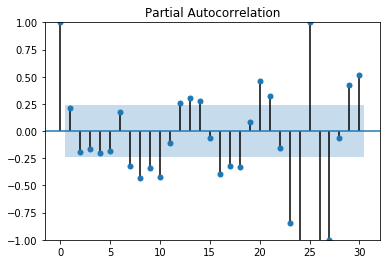

In [22]:
sm.graphics.tsa.plot_acf(diff_city_O3, lags=30)
sm.graphics.tsa.plot_pacf(diff_city_O3,lags=30)

P Q value for O3= 1,1

In [23]:
start = '2018-01-01'
end = '2018-05-01'
train = cities[:start]
test = cities[start:end]

In [24]:
modelAQI = sm.tsa.SARIMAX(train['India_AQI'],order = (1,1,1), seasonal_order=(1,0,1,12))
modelPM = sm.tsa.SARIMAX(train['India_PM'], order = (1,1,1), seasonal_order=(1,1,1,12))
modelN = sm.tsa.SARIMAX(train['India_N'], order = (2,0,2), seasonal_order=(1,1,1,12))
modelNH3 = sm.tsa.SARIMAX(train['India_NH3'], order = (1,1,1), seasonal_order=(1,1,1,12))
modelSO2 = sm.tsa.SARIMAX(train['India_SO2'], order = (2,1,2), seasonal_order=(1,1,1,12))
modelO3 = sm.tsa.SARIMAX(train['India_O3'], order = (1,1,1), seasonal_order=(1,1,1,12))

In [25]:
fitAQI = modelAQI.fit()
fitPM = modelPM.fit()
fitN = modelN.fit()
fitNH3 = modelNH3.fit()
fitSO2 = modelSO2.fit()
fitO3 = modelO3.fit()

In [26]:
pred_AQI = fitAQI.predict(start = start, end = end, dynamic = True)
pred_PM = fitPM.predict(start = start, end = end, dynamic = True)
pred_N = fitN.predict(start = start, end = end, dynamic = True)
pred_NH3 = fitNH3.predict(start = start, end = end, dynamic = True)
pred_SO2 = fitSO2.predict(start = start, end = end, dynamic = True)
pred_O3 = fitO3.predict(start = start, end = end, dynamic = True)

In [27]:
from sklearn.metrics import mean_squared_error
RMSE_AQI=np.sqrt(mean_squared_error(pred_AQI,test['India_AQI'][start:end]))
print('RMSE for AQI= ',RMSE_AQI)
mapeAQI= np.mean(np.abs((pred_AQI- test['India_AQI'][start:end]) / test['India_AQI'][start:end])) * 100
print('MAPE = ', mapeAQI)

RMSE_PM=np.sqrt(mean_squared_error(pred_PM,test['India_PM'][start:end]))
print('RMSE for PM= ',RMSE_PM)
mapePM= np.mean(np.abs((pred_PM- test['India_PM'][start:end]) / test['India_PM'][start:end])) * 100
print('MAPE = ', mapePM)

RMSE_N=np.sqrt(mean_squared_error(pred_N,test['India_N'][start:end]))
print('RMSE for N= ',RMSE_N)
mapeN= np.mean(np.abs((pred_N- test['India_N'][start:end]) / test['India_N'][start:end])) * 100
print('MAPE = ', mapeN)

RMSE_NH3=np.sqrt(mean_squared_error(pred_NH3,test['India_NH3'][start:end]))
print('RMSE for NH3= ',RMSE_NH3)
mapeNH3= np.mean(np.abs((pred_NH3- test['India_NH3'][start:end]) / test['India_NH3'][start:end])) * 100
print('MAPE = ', mapeNH3)

RMSE_SO2=np.sqrt(mean_squared_error(pred_SO2,test['India_SO2'][start:end]))
print('RMSE for SO2= ',RMSE_SO2)
mapeSO2= np.mean(np.abs((pred_SO2- test['India_SO2'][start:end]) / test['India_SO2'][start:end])) * 100
print('MAPE = ', mapeSO2)

RMSE_O3=np.sqrt(mean_squared_error(pred_O3,test['India_O3'][start:end]))
print('RMSE for O3= ',RMSE_O3)
mapeO3= np.mean(np.abs((pred_O3- test['India_O3'][start:end]) / test['India_O3'][start:end])) * 100
print('MAPE = ', mapeO3)

RMSE for AQI=  21.65681701412844
MAPE =  10.678253931666394
RMSE for PM=  41.910684701900216
MAPE =  18.59535809340985
RMSE for N=  19.94644102030076
MAPE =  14.107317227358376
RMSE for NH3=  4.450099962877927
MAPE =  16.287247021026534
RMSE for SO2=  6.978331683424852
MAPE =  18.681918058312434
RMSE for O3=  3.6616573754559565
MAPE =  7.912910365927396


In [28]:
start = '2019-06-01'
end = '2020-07-01'
train = cities[:start]
test = cities[start:]

In [29]:
modelAQI = sm.tsa.SARIMAX(train['India_AQI'],order = (1,1,1), seasonal_order=(1,0,1,12))
modelPM = sm.tsa.SARIMAX(train['India_PM'], order = (1,1,1), seasonal_order=(1,1,1,12))
modelN = sm.tsa.SARIMAX(train['India_N'], order = (2,0,2), seasonal_order=(1,1,1,12))
modelNH3 = sm.tsa.SARIMAX(train['India_NH3'], order = (1,1,1), seasonal_order=(1,1,1,12))
modelSO2 = sm.tsa.SARIMAX(train['India_SO2'], order = (2,1,2), seasonal_order=(1,1,1,12))
modelO3 = sm.tsa.SARIMAX(train['India_O3'], order = (1,1,1), seasonal_order=(1,1,1,12))

In [30]:
fitAQI = modelAQI.fit()
fitPM = modelPM.fit()
fitN = modelN.fit()
fitNH3 = modelNH3.fit()
fitSO2 = modelSO2.fit()
fitO3 = modelO3.fit()

In [31]:
pred_AQI = fitAQI.predict(start = start, end = end, dynamic = True)
pred_PM = fitPM.predict(start = start, end = end, dynamic = True)
pred_N = fitN.predict(start = start, end = end, dynamic = True)
pred_NH3 = fitNH3.predict(start = start, end = end, dynamic = True)
pred_SO2 = fitSO2.predict(start = start, end = end, dynamic = True)
pred_O3 = fitO3.predict(start = start, end = end, dynamic = True)

In [32]:
from sklearn.metrics import mean_squared_error
print('Errors for covid data')
RMSE_AQI1=np.sqrt(mean_squared_error(pred_AQI,test['India_AQI'][start:end]))
print('RMSE for AQI= ',RMSE_AQI1)
mapeAQI1= np.mean(np.abs((pred_AQI- test['India_AQI'][start:end]) / test['India_AQI'][start:end])) * 100
print('MAPE = ', mapeAQI1)

RMSE_PM1=np.sqrt(mean_squared_error(pred_PM,test['India_PM'][start:end]))
print('RMSE for PM= ',RMSE_PM1)
mapePM1= np.mean(np.abs((pred_PM- test['India_PM'][start:end]) / test['India_PM'][start:end])) * 100
print('MAPE = ', mapePM1)

RMSE_N1=np.sqrt(mean_squared_error(pred_N,test['India_N'][start:end]))
print('RMSE for N= ',RMSE_N1)
mapeN1= np.mean(np.abs((pred_N- test['India_N'][start:end]) / test['India_N'][start:end])) * 100
print('MAPE = ', mapeN1)

RMSE_NH31=np.sqrt(mean_squared_error(pred_NH3,test['India_NH3'][start:end]))
print('RMSE for NH3= ',RMSE_NH31)
mapeNH31= np.mean(np.abs((pred_NH3- test['India_NH3'][start:end]) / test['India_NH3'][start:end])) * 100
print('MAPE = ', mapeNH31)

RMSE_SO21=np.sqrt(mean_squared_error(pred_SO2,test['India_SO2'][start:end]))
print('RMSE for SO2= ',RMSE_SO21)
mapeSO21= np.mean(np.abs((pred_SO2- test['India_SO2'][start:end]) / test['India_SO2'][start:end])) * 100
print('MAPE = ', mapeSO21)

RMSE_O31=np.sqrt(mean_squared_error(pred_O3,test['India_O3'][start:end]))
print('RMSE for O3= ',RMSE_O31)
mapeO31= np.mean(np.abs((pred_O3- test['India_O3'][start:end]) / test['India_O3'][start:end])) * 100
print('MAPE = ', mapeO31)

Errors for covid data
RMSE for AQI=  44.965194507031235
MAPE =  37.666664680909015
RMSE for PM=  55.14608355597883
MAPE =  42.94916760906073
RMSE for N=  18.212147362230777
MAPE =  24.89385734979802
RMSE for NH3=  2.959081747074586
MAPE =  13.207210788901971
RMSE for SO2=  3.3026528419699743
MAPE =  21.78806082642239
RMSE for O3=  4.361368005484867
MAPE =  10.818781505461022


In [33]:
actual_AQI = test['India_AQI']

In [34]:
actual_AQI.to_frame()
pred_AQI.to_frame()

,predicted_mean
2019-06-01,141.190415
2019-07-01,115.248848
2019-08-01,116.692567
2019-09-01,123.672446
2019-10-01,183.599416
2019-11-01,229.142112
2019-12-01,222.373213
2020-01-01,231.068830
2020-02-01,193.661777
2020-03-01,169.016822


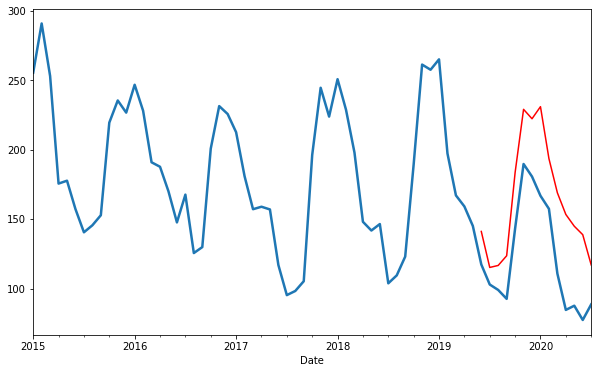

In [35]:
cities['India_AQI'].plot(kind='line',grid=True,figsize=(10, 6), linewidth=2.5)
pred_AQI.plot(kind = 'line', color = 'red')
plt.savefig('final_aqi.png')